<a href="https://colab.research.google.com/github/issatyajit/Netflix-recommender-system/blob/main/NETFLIX_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import MultiLabelBinarizer
import scipy

# figure size in inches
rcParams['figure.figsize'] = 25,8

import warnings
warnings.filterwarnings('ignore')

from scipy.stats  import norm


from sklearn.preprocessing import OneHotEncoder
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

from tqdm import tqdm

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#**Exploratory Data Analysis**

##Checking for null values

In [83]:
print(f'shape is {df.shape}')
print(f'columns:{list(df.columns)}')

shape is (7787, 12)
columns:['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [84]:
df.isnull().sum()[df.isnull().sum() !=0]

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

##Checking if TV Shows have repititions as different seasons

In [85]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [86]:
len(df[df['type']=='TV Show']['title'].unique()) #therefore all titles are unique no season 1 and season 2 type of data exists

2410

##Getting top 10 directors (by number of movies directed), their country and the type of work

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

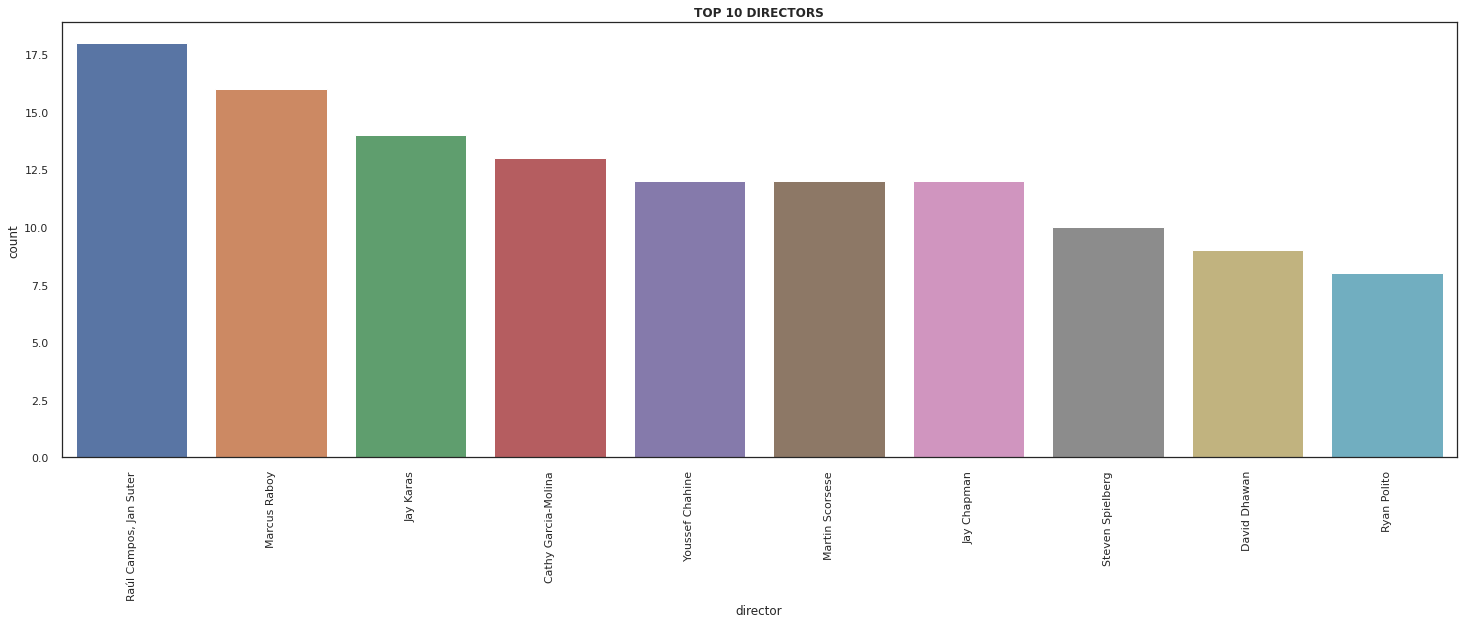

In [87]:
sns.set_theme(style='white')
sns.countplot(x='director', data = df , order = pd.DataFrame(df['director'].value_counts()).head(10).index)
plt.title('TOP 10 DIRECTORS',weight='bold')
plt.xticks(rotation = 90)

In [ ]:
top_dir = pd.DataFrame(df['director'].value_counts()).index
dir_country = []
dir_genre = []
dir_type = []
for i in range(10):
  dir_country.append(list(df[df['director']==top_dir[i]]['country'].unique()))
  dir_genre.append(list(df[df['director']==top_dir[i]]['listed_in'].unique()))
  dir_type.append(list(df[df['director']==top_dir[i]]['type'].unique()))
dir_country_dict=dict(zip(list(top_dir[0:10]),dir_country))
dir_genre_dict=dict(zip(list(top_dir[0:10]),dir_genre))
dir_type_dict=dict(zip(list(top_dir[0:10]),dir_type))

In [ ]:
dir_country_dict

{'Cathy Garcia-Molina': ['Philippines'],
 'David Dhawan': ['India'],
 'Jay Chapman': ['United States'],
 'Jay Karas': ['United States'],
 'Marcus Raboy': ['United States', nan],
 'Martin Scorsese': ['United States',
  'United States, Italy',
  'United Kingdom, United States, France',
  'United Kingdom, United States, Japan',
  'United States, Hong Kong'],
 'Raúl Campos, Jan Suter': ['Mexico', 'Colombia', 'Argentina', 'Chile'],
 'Ryan Polito': ['United States'],
 'Steven Spielberg': ['United States, Canada',
  'United States',
  'United States, India',
  'United States, New Zealand, United Kingdom'],
 'Youssef Chahine': ['Egypt, Algeria',
  'France, Egypt',
  'Egypt',
  'Egypt, France']}

In [ ]:
dir_genre_dict

{'Cathy Garcia-Molina': ['Dramas, International Movies, Romantic Movies',
  'International Movies, Romantic Movies',
  'Comedies, Dramas, International Movies',
  'Comedies, International Movies, Romantic Movies'],
 'David Dhawan': ['Comedies, International Movies, Romantic Movies',
  'Comedies, International Movies, Music & Musicals',
  'Action & Adventure, Comedies, Dramas',
  'Action & Adventure, Comedies, International Movies',
  'Comedies, International Movies, Sci-Fi & Fantasy'],
 'Jay Chapman': ['Stand-Up Comedy'],
 'Jay Karas': ['Stand-Up Comedy',
  'Children & Family Movies, Comedies, Sports Movies'],
 'Marcus Raboy': ['Stand-Up Comedy',
  'Stand-Up Comedy & Talk Shows, TV Comedies'],
 'Martin Scorsese': ['Classic Movies, Comedies, Dramas',
  'Dramas',
  'Classic Movies, Dramas',
  'Children & Family Movies, Dramas',
  'Classic Movies, Dramas, Independent Movies',
  'Documentaries, Music & Musicals',
  'Classic Movies, Dramas, Sports Movies',
  'Classic Movies, Dramas, Thrille

In [ ]:
dir_type_dict

{'Cathy Garcia-Molina': ['Movie'],
 'David Dhawan': ['Movie'],
 'Jay Chapman': ['Movie'],
 'Jay Karas': ['Movie'],
 'Marcus Raboy': ['Movie', 'TV Show'],
 'Martin Scorsese': ['Movie'],
 'Raúl Campos, Jan Suter': ['Movie'],
 'Ryan Polito': ['Movie', 'TV Show'],
 'Steven Spielberg': ['Movie'],
 'Youssef Chahine': ['Movie']}

##Top 10 actors (by number of movies appeared in)

In [ ]:
work_df = pd.DataFrame(df['cast']).dropna().reset_index(drop=True)

In [ ]:
actors = np.array([])
for i in range(work_df.shape[0]):
  actors_list = work_df['cast'][i].split(',')
  actors = np.append(actors,actors_list)

In [ ]:
actors_df = pd.DataFrame(actors,columns=['actors'])

In [ ]:
actors_df

,actors
0,João Miguel
1,Bianca Comparato
2,Michel Gomes
3,Rodolfo Valente
4,Vaneza Oliveira
...,...
55950,Anita Shabdish
55951,Chittaranjan Tripathy
55952,Nasty C
55953,Adriano Zumbo


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

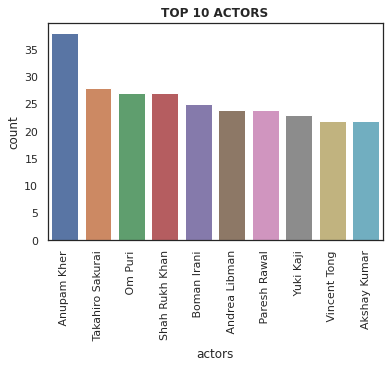

In [ ]:
sns.set_theme(style='white')
sns.countplot(x='actors', data = actors_df , order = actors_df['actors'].value_counts().head(10).index)
plt.title('TOP 10 ACTORS',weight='bold')
plt.xticks(rotation = 90)

##Top 10 countries

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

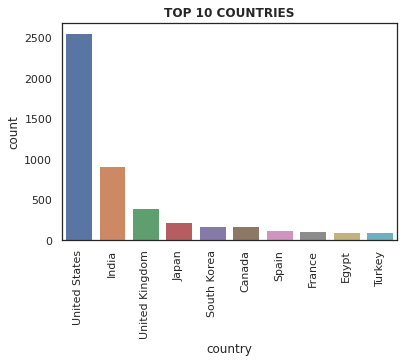

In [ ]:
sns.set_theme(style='white')
sns.countplot(x='country', data = df , order = pd.DataFrame(df['country'].value_counts()).head(10).index)
plt.title('TOP 10 COUNTRIES',weight='bold')
plt.xticks(rotation = 90)

##When movies are added to the netflix

In [ ]:
df2 = pd.DataFrame(df['date_added']).dropna().reset_index(drop=True)

In [ ]:
df2.head()

,date_added
0,"August 14, 2020"
1,"December 23, 2016"
2,"December 20, 2018"
3,"November 16, 2017"
4,"January 1, 2020"


In [ ]:
df2['month_added'] = df['date_added'].apply(lambda x: str(x).split()[0])

In [ ]:
df2=df2.dropna()

In [ ]:
df2.head()

,date_added,month_added
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


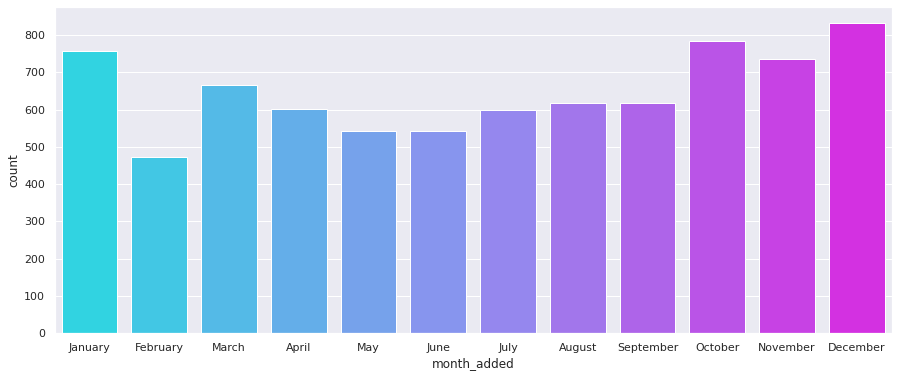

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added',data=df2,order=new_order,palette='cool')

##How ratings changed over the years ?

In [ ]:
wdf = pd.DataFrame(df['release_year'].value_counts()).sort_index().rename(columns={'release_year':'movie_counts'}).reset_index()

<BarContainer object of 73 artists>

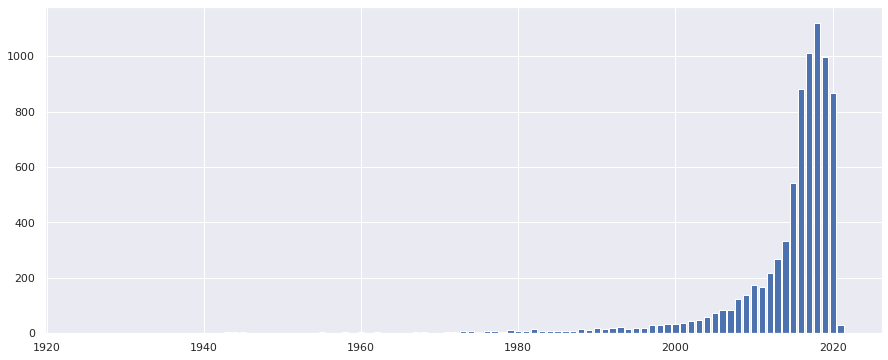

In [ ]:
plt.bar(wdf['index'],wdf['movie_counts'])

Since, number of movies is extremely less for the early years we work only with movies released after 2000

<BarContainer object of 22 artists>

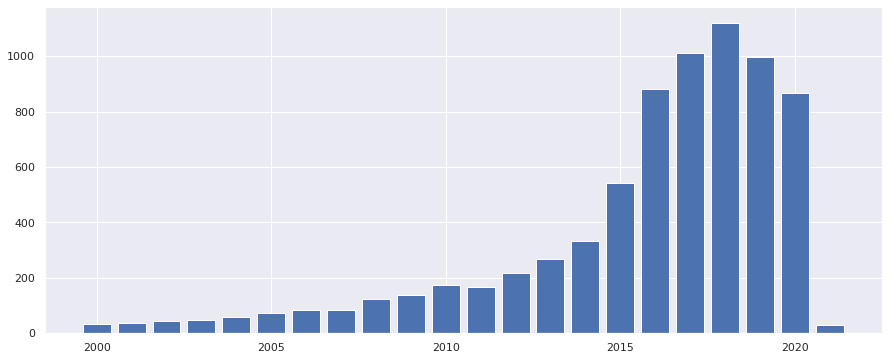

In [ ]:
wdf = wdf[wdf['index']>=2000]
plt.bar(wdf['index'],wdf['movie_counts'])

In [ ]:
movie_df = df[df['type']=='Movie']
movie_df = movie_df[movie_df['release_year']>=2000]
mdf = movie_df[['rating','release_year']].dropna().reset_index(drop=True)
mdf = mdf[mdf['rating'].isin(['R','PG-13','PG','G','NR','UR'])]
rdf = mdf.groupby(['release_year','rating']).agg({'rating':'count'}).fillna(0).rename(columns={'rating':'count'})

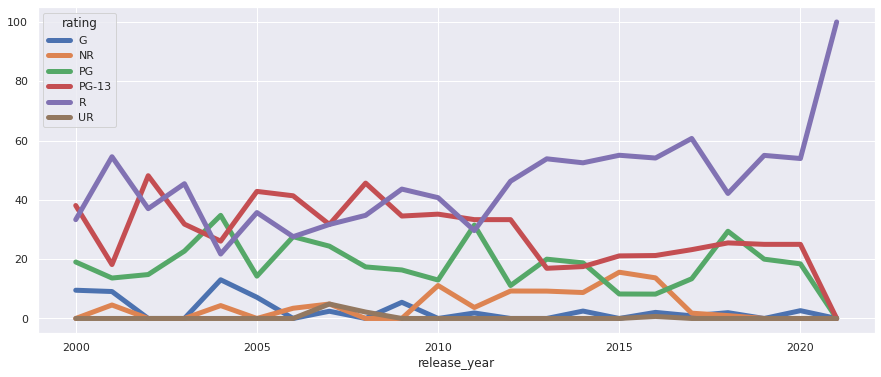

In [ ]:
rdf.groupby(['release_year'])['count'].transform(lambda x: x*100/x.sum()).unstack().fillna(0).plot(linewidth=5.0)

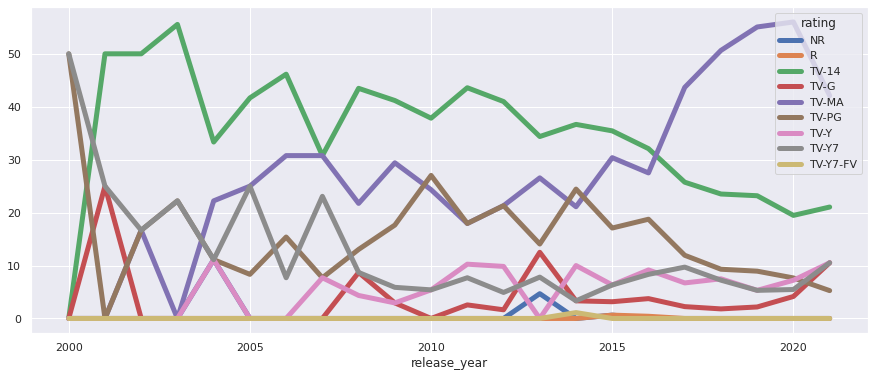

In [ ]:
show_df = df[df['type']=='TV Show']
show_df = show_df[show_df['release_year']>=2000]
mdf = show_df[['rating','release_year']].dropna().reset_index(drop=True)
sdf = mdf.groupby(['release_year','rating']).agg({'rating':'count'}).fillna(0).rename(columns={'rating':'count'})
sdf.groupby(['release_year'])['count'].transform(lambda x: x*100/x.sum()).unstack().fillna(0).plot(linewidth=5.0,grid=True)

#**Type of contents availabe in different countries**

In [ ]:
df1 = df[['country','rating','listed_in','type']].dropna().reset_index(drop=True)

In [ ]:
tdf = df1[~df1['country'].str.contains(',')]

In [ ]:
tdf.isnull().sum()

country      0
rating       0
listed_in    0
type         0
dtype: int64

##Content available by rating

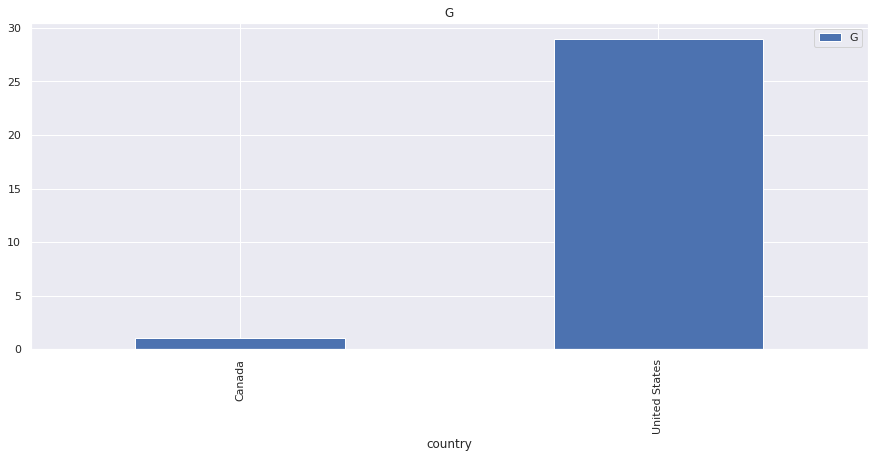

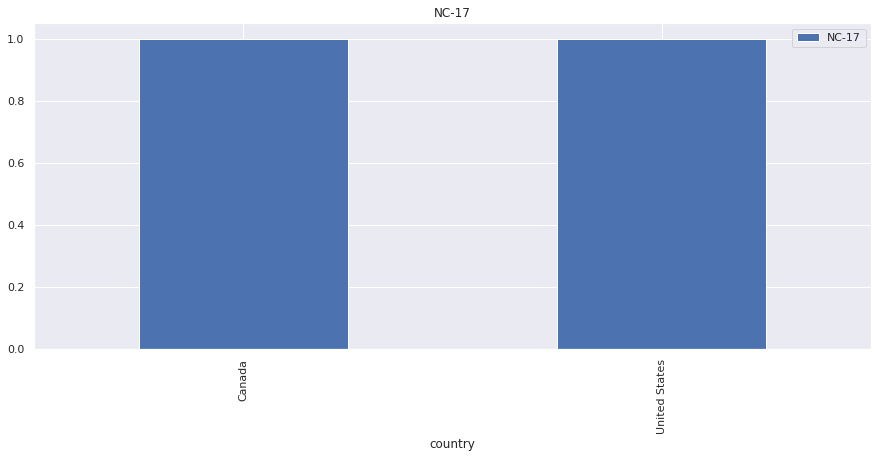

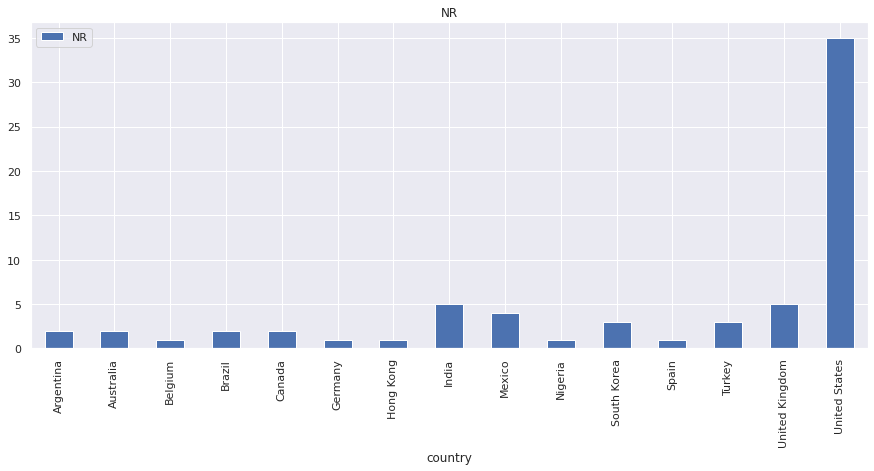

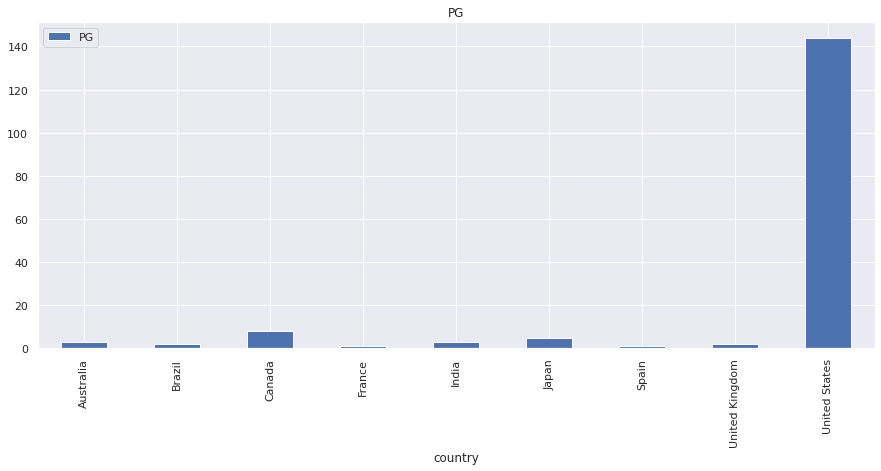

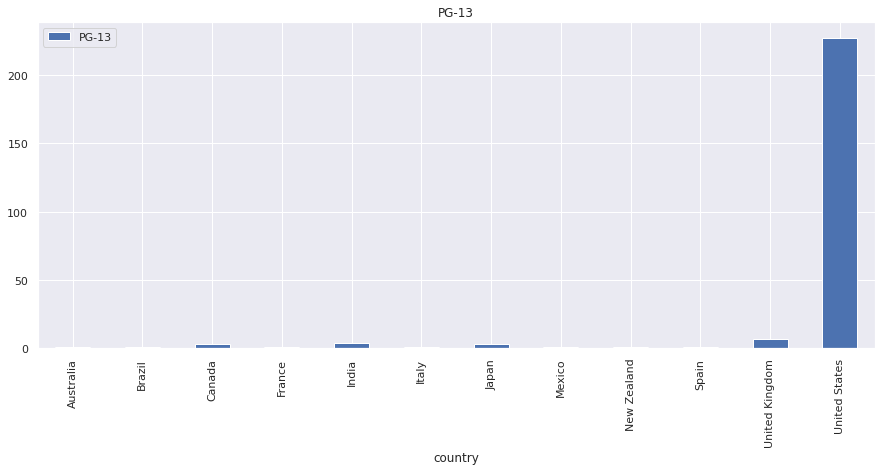

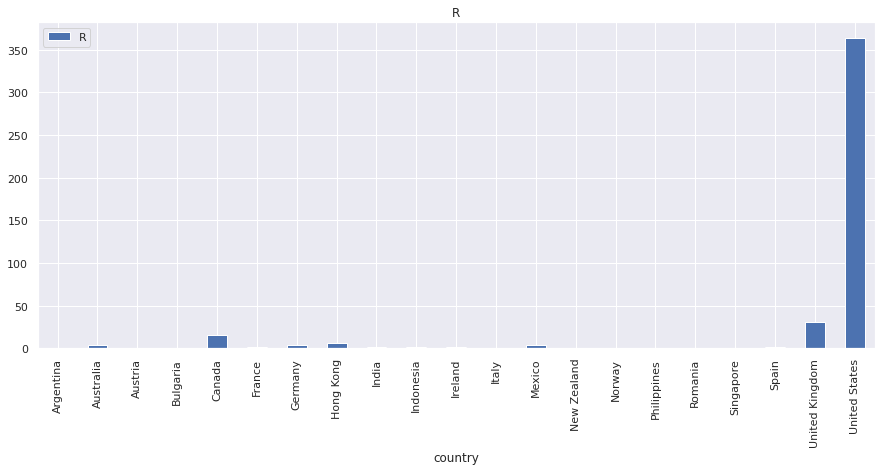

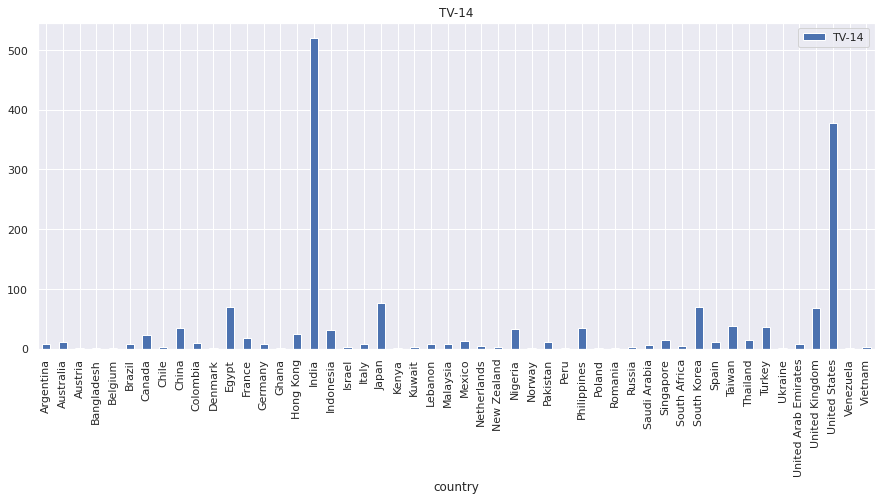

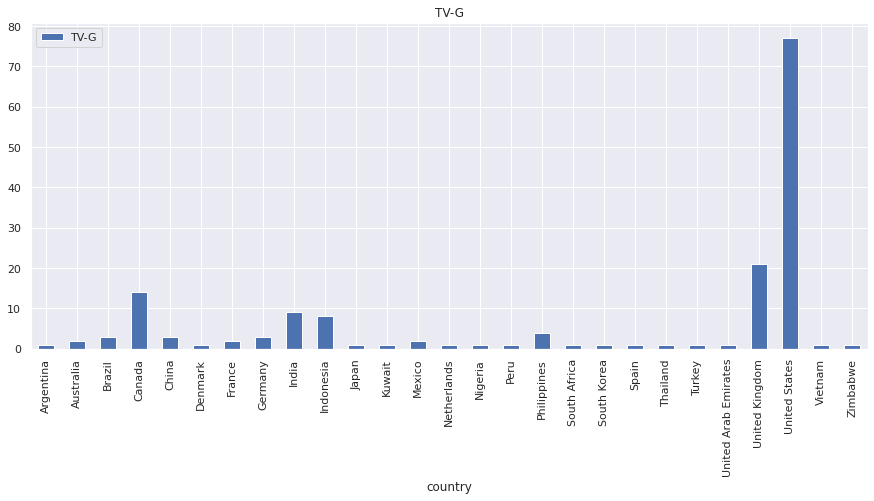

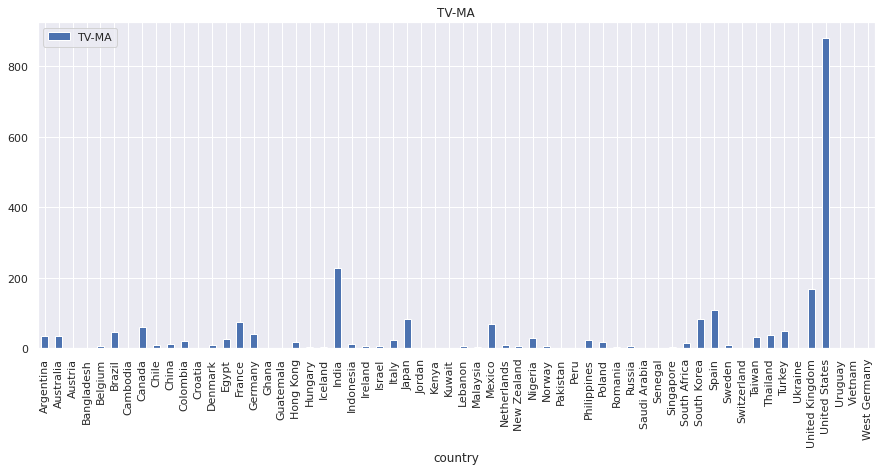

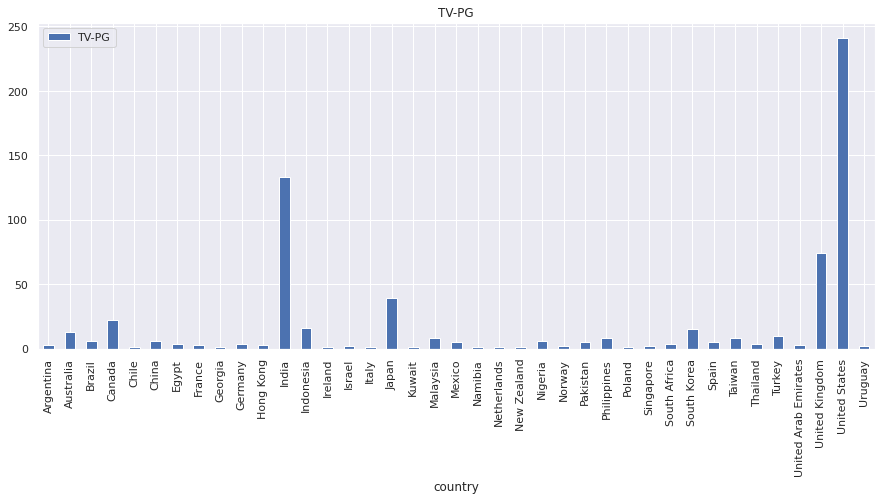

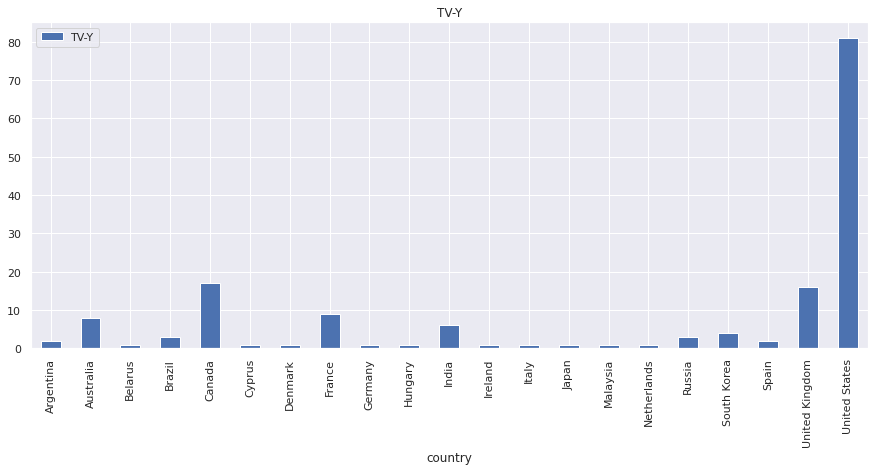

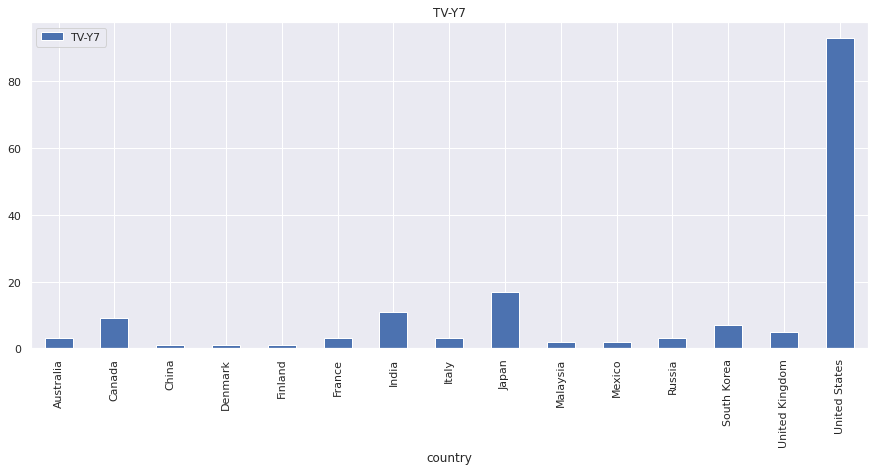

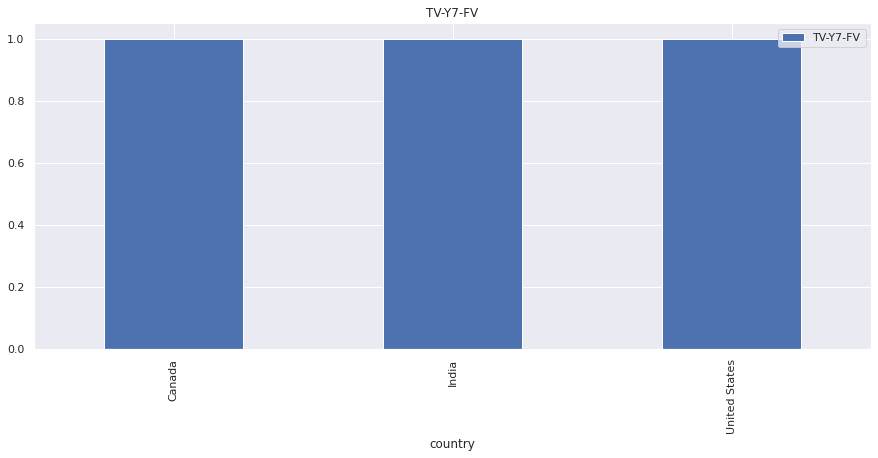

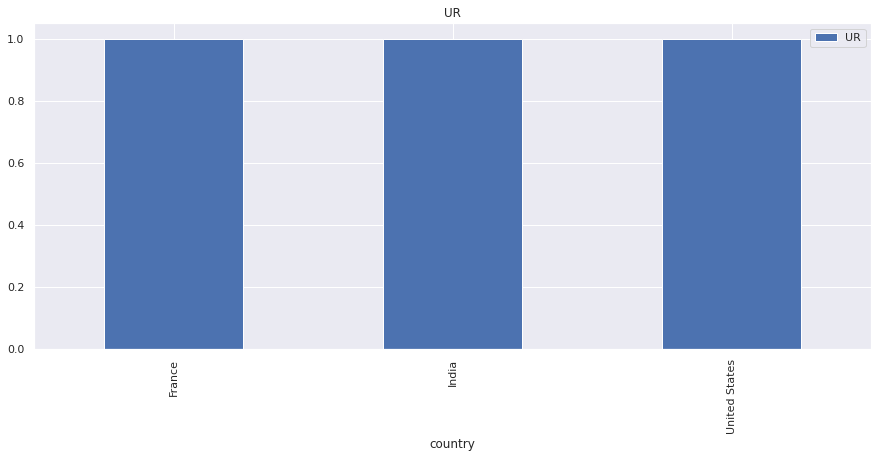

In [ ]:
c_df = tdf.groupby(['country','rating'])['rating'].count().unstack().fillna(0)
for i,rating, in list(enumerate(c_df.columns.to_list())):
  pd.DataFrame(c_df[c_df[rating] != 0][rating]).plot(kind='bar',title=rating)
  plt.show()

##Content available by type in every country

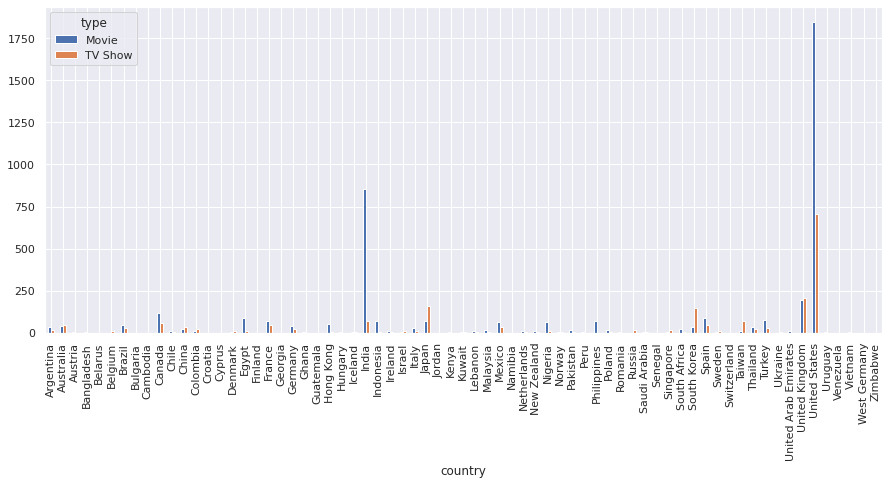

In [ ]:
mdf = tdf.groupby(['country','type'])['type'].count().unstack().fillna(0)
mdf.plot(kind='bar',grid=True)

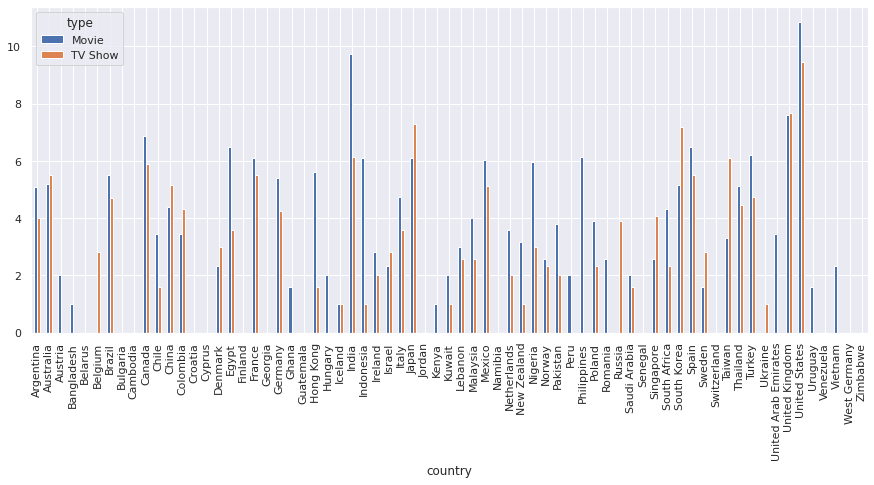

In [ ]:
(np.log2(mdf)).replace(-np.inf, 0).plot(kind='bar',grid=True)

##Content available by genre

In [ ]:
tdf

,country,rating,listed_in,type
0,Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",TV Show
1,Mexico,TV-MA,"Dramas, International Movies",Movie
2,Singapore,R,"Horror Movies, International Movies",Movie
3,United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",Movie
4,United States,PG-13,Dramas,Movie
...,...,...,...,...
7267,Mexico,TV-MA,"International TV Shows, Spanish-Language TV Sh...",TV Show
7268,India,TV-MA,"Dramas, Independent Movies, International Movies",Movie
7269,United States,PG,"Children & Family Movies, Comedies",Movie
7271,India,TV-14,"Dramas, International Movies, Music & Musicals",Movie


In [ ]:
tdf=pd.DataFrame(tdf[['country','listed_in']])
tdf['genre'] = tdf['listed_in'].apply(lambda x: x.split(','))
tdf.drop('listed_in',axis=1,inplace=True)
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(sparse_output=True)
X = mlb.fit_transform(tdf['genre'])
df1 = tdf.join(pd.DataFrame.sparse.from_spmatrix(X,
                index=tdf.drop(columns='genre').index,
                columns=mlb.classes_))


In [ ]:
df1.drop(columns='genre',inplace=True)

In [ ]:
df1.reset_index(drop=True,inplace=True)

In [ ]:
df1.head()

,country,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,International TV Shows,Kids' TV,Korean TV Shows,LGBTQ Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Thrillers,Teen TV Shows,Thrillers,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Horror Movies,Independent Movies,International Movies,International TV Shows,Kids' TV,LGBTQ Movies,Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
0,Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mexico,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Singapore,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,United States,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
genres = df1.columns.to_list()[1:]

In [ ]:
genre_sum_dict = {}
for genre in genres:
  genre_sum_dict[genre]=df1[genre].sum()

In [ ]:
genres=genre_sum_dict.keys()
genre_count=genre_sum_dict.values()
df1 = pd.DataFrame(list(zip(genres, genre_count)),
               columns =['genre', 'count'])

In [ ]:
df1.set_index('genre',inplace=True)

<BarContainer object of 73 artists>

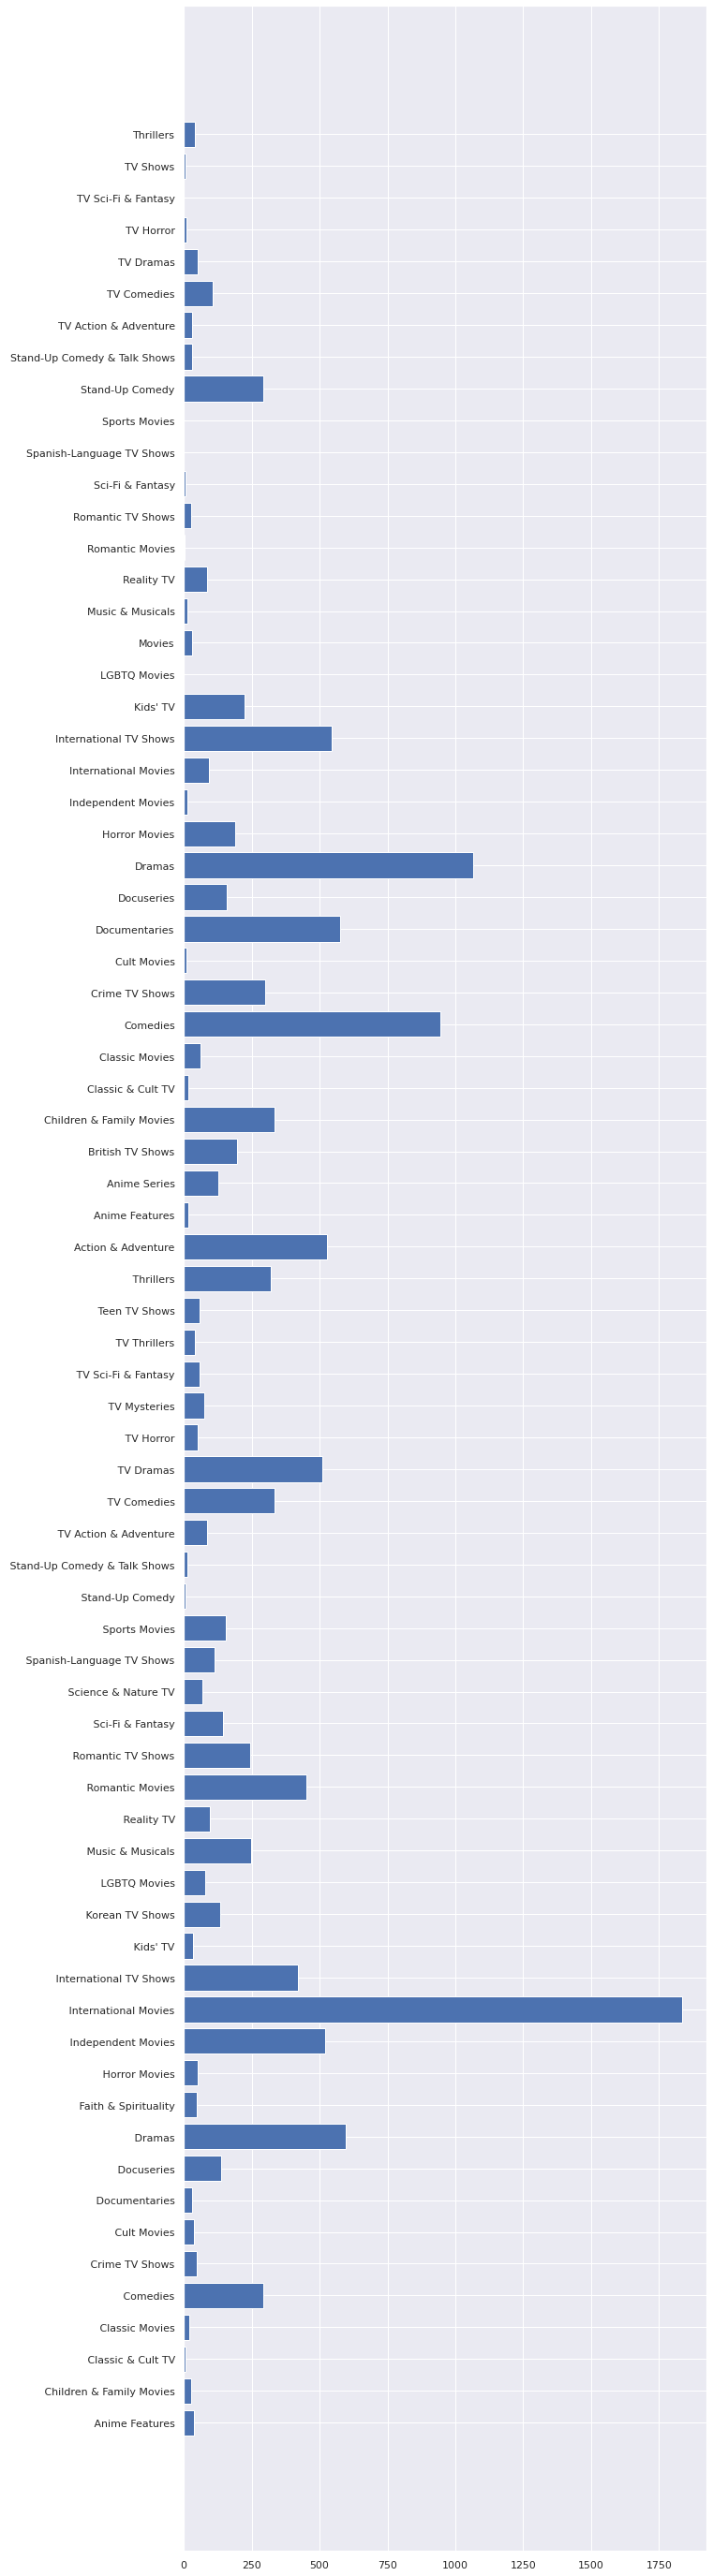

In [ ]:
plt.figure(figsize=(10, 50))
plt.barh(list(genres), list(genre_count))

#**Has Netflix been increasingly focusing on TV rather than movies in recent years.**

**$H_{0}$= Netflix is not focusing more on TV Series than movies i.e., p=0.5 (where p is the proportion of movies released in recent years)**



**$H_{A}$ = Netflix is focusing less on movies i.e., $p<0.5$ we will be conducting left tailed test..**

In [ ]:
df['year_added'] = df['date_added'].apply(lambda x: str(x)[-4:])

In [ ]:
hdf = df.groupby(['year_added','type'])['show_id'].count().unstack().fillna(0).reset_index()

In [ ]:
hdf = hdf.loc[:13]

In [ ]:
hdf = hdf.astype({'year_added':int})

In [ ]:
hdf2 = hdf[hdf['year_added']>=2010]

In [ ]:
hdf2['movie_%'] = hdf2['Movie']*100 / (hdf2['Movie'] + hdf2['TV Show'])

In [ ]:
hdf2.describe()

type,year_added,Movie,TV Show,movie_%
count,12.000000,12.000000,12.000000,12.000000
mean,2015.500000,447.833333,199.916667,75.812986
std,3.605551,599.656392,267.614532,15.937938
min,2010.000000,1.000000,0.000000,54.545455
25%,2012.750000,11.250000,3.750000,65.758349
50%,2015.500000,73.000000,29.500000,72.505662
75%,2018.250000,961.750000,378.250000,82.000000
max,2021.000000,1497.000000,697.000000,100.000000


In [ ]:
z=(0.75-0.5)/(np.sqrt(0.5*0.5/12))

In [ ]:
z

1.7320508075688774

In [ ]:
norm.cdf(1.73)

0.9581848623864051

Therefore, we cannot reject the null hypothesis. This can further be seen in the plots

In [ ]:
df3 = df[['date_added','type']]

In [ ]:
df3['year_added'] = df['date_added'].apply(lambda x: str(x)[-4:])

In [ ]:
df3 = df3.dropna()

In [ ]:
df3 = df3.astype({'year_added':int})

In [ ]:
df3 = df3.sort_values(by=['year_added'], ascending=True)

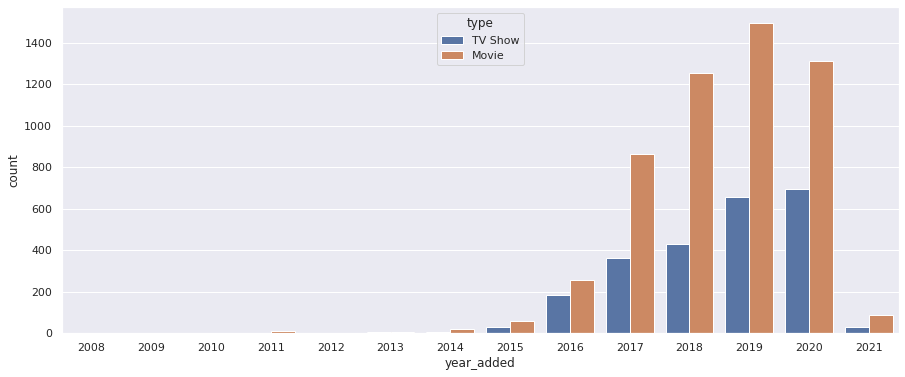

In [ ]:
sns.countplot(x='year_added',data=df3,hue=df3['type'])

Moreover we have many reasons to believe that netflix adds more movies in their platfom than TV-Shows. Just the shear duration and production time supports this heavily.

#**Clustering and Recommender systems**

## A heurestical approach depending on genre and type. (Based on k-nn)

In [ ]:
df.head() #Since we don't have a rich dataset we try not to use any columns with high null values


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [ ]:
df3 = df[['show_id','title','type','rating','listed_in']].dropna().reset_index(drop=True)

In [ ]:
df3['genre'] = df['listed_in'].apply(lambda x: str(x).split(','))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore")
X=encoder.fit_transform(df3[['type','rating']])

In [ ]:
X.toarray().shape

(7780, 16)

In [ ]:
encoder.get_feature_names_out()

array(['type_Movie', 'type_TV Show', 'rating_G', 'rating_NC-17',
       'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R',
       'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG',
       'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR'],
      dtype=object)

In [ ]:
df3_encoded = pd.DataFrame(X.toarray(),columns=encoder.get_feature_names_out()).astype(int)

In [ ]:
df4 = pd.concat([df3,df3_encoded],axis=1).drop(columns=['type','rating','listed_in'])

In [ ]:
mlb = MultiLabelBinarizer(sparse_output=True)
df5=df4.join(pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df4.pop('genre')),
                index=df4.index,
                columns=mlb.classes_))

In [ ]:
df5 = df5.drop(columns=['show_id']).reset_index().rename(columns={'index':'id'})

In [ ]:
genres_list = list(df5.columns)[2:]
genres_list

In [ ]:
#calculating distance between two movies in space
from scipy import spatial
def dist(id1,id2):
  XA=df5[df5['id']==id1][genres_list].values #from actual_set
  XB=df5[df5['id']==id2][genres_list].values #scanning through train set part
  return spatial.distance.cosine(XA,XB),id1,id2

In [ ]:
def get_recommended(id1,n):
  '''Enter movie id name on which you want to get recommended and the number of recommendations you want'''
  input_movie_name = df5["title"][id1]
  print(f'selected show/movie is {input_movie_name}')
  input_array = df5[df5['id']==id1][genres_list].to_numpy()
  movie_dists=[]
  for i in list(df5['id']):
    movie_dists.append(dist(id1,i))
  X = sorted(movie_dists, 
       key=lambda x: x[0])
  recom_id = []
  for i in X:
    recom_id.append(i[2])
  Z=[x for x in recom_id if x not in [id1]]
  recom_cont = []
  for k in Z:
    recom_cont.append(df5[df5["id"]==k]["title"].to_list())
  print('Recommended Movies are:')
  return recom_cont[:n]

In [ ]:
get_recommended(1783,9)

selected show/movie is Diva Brides
Recommended Movies are:


[['Diablero'],
 ['Episodes'],
 ['La Niña'],
 ['Bright: The Music Videos'],
 ['Burned Cocoon'],
 ['Charité'],
 ["Dragon's Dogma"],
 ['Imposters'],
 ['Murderous Affairs']]

In [ ]:
get_recommended(5766,10)

selected show/movie is Spy Kids
Recommended Movies are:


[['A Wrinkle in Time'],
 ['Aliens Ate My Homework'],
 ['Dolphin Tale 2'],
 ['Hop'],
 ['Howards End'],
 ['Monster House'],
 ['Spy Kids 2: The Island of Lost Dreams'],
 ['The Prince & Me'],
 ['A Cinderella Story: Christmas Wish'],
 ['Bee Movie']]

##Text pre processing

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df= df.rename(columns={'title':'NAME'})

In [ ]:
df = df.fillna('')

In [ ]:
req_var = ['show_id','type','NAME','director','cast','country','rating','listed_in','description']

In [ ]:
df = df[req_var]

In [ ]:
df['text'] =  df['NAME'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description'] 

In [ ]:
df = df.drop(columns=['director','cast','listed_in','description'])

In [ ]:
df.head()

,show_id,type,NAME,country,rating,text
0,s1,TV Show,3%,Brazil,TV-MA,"3% João Miguel, Bianca Comparato, Michel Gome..."
1,s2,Movie,7:19,Mexico,TV-MA,"7:19 Jorge Michel Grau Demián Bichir, Héctor B..."
2,s3,Movie,23:59,Singapore,R,"23:59 Gilbert Chan Tedd Chan, Stella Chung, He..."
3,s4,Movie,9,United States,PG-13,"9 Shane Acker Elijah Wood, John C. Reilly, Jen..."
4,s5,Movie,21,United States,PG-13,"21 Robert Luketic Jim Sturgess, Kevin Spacey, ..."


In [ ]:
df1 = df.copy()

In [ ]:
enc = OneHotEncoder(handle_unknown="ignore")
X=enc.fit_transform(df[['type','rating','country']])

In [ ]:
df_encoded = pd.DataFrame(X.toarray(),columns=enc.get_feature_names_out()).astype(int)

In [ ]:
df2 = pd.concat([df,df_encoded],axis=1).drop(columns=['type','rating','country'])

In [ ]:
df2.head()

,show_id,NAME,text,type_Movie,type_TV Show,rating_,rating_G,rating_NC-17,rating_NR,rating_PG,...,"country_Uruguay, Argentina, Germany, Spain","country_Uruguay, Argentina, Spain","country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,"country_Venezuela, Colombia",country_Vietnam,country_West Germany,country_Zimbabwe
0,s1,3%,"3% João Miguel, Bianca Comparato, Michel Gome...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,7:19,"7:19 Jorge Michel Grau Demián Bichir, Héctor B...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s3,23:59,"23:59 Gilbert Chan Tedd Chan, Stella Chung, He...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,s4,9,"9 Shane Acker Elijah Wood, John C. Reilly, Jen...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,s5,21,"21 Robert Luketic Jim Sturgess, Kevin Spacey, ...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#text processing
import string
def get_lower(X):  #lowercasing
  A=[i.lower() for i in X]
  return ''.join(A)

#removing punctuation
#removing punctuation
punct=[punc for punc in string.punctuation]


def remove_punctuation(X):
  A=[i for i in X if i not in punct]
  return ''.join(A)

import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords

#removing stopwords
stopwords=stopwords.words('english')
def remove_stopwords(X):
  B=''
  X=X.split() #X is now a list
  A=[i for i in X if i not in stopwords]
  return ' '.join(A)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df2['text']=df2['text'].apply(get_lower)
df2['text']=df2['text'].apply(remove_punctuation)
df2['text']=df2['text'].apply(remove_stopwords)

In [ ]:
df2.head()

,show_id,NAME,text,type_Movie,type_TV Show,rating_,rating_G,rating_NC-17,rating_NR,rating_PG,...,"country_Uruguay, Argentina, Germany, Spain","country_Uruguay, Argentina, Spain","country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,"country_Venezuela, Colombia",country_Vietnam,country_West Germany,country_Zimbabwe
0,s1,3%,3 joão miguel bianca comparato michel gomes ro...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,7:19,719 jorge michel grau demián bichir héctor bon...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s3,23:59,2359 gilbert chan tedd chan stella chung henle...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,s4,9,9 shane acker elijah wood john c reilly jennif...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,s5,21,21 robert luketic jim sturgess kevin spacey ka...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
#lemmatizer
def lemmatize(x):
  word_list = nltk.word_tokenize(x)
  lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
  return lemmatized_output

In [ ]:
df2_copy = df2.copy()

In [ ]:
df2_copy['text'] = df2_copy['text'].apply(lambda x: lemmatize(x))

In [ ]:
df2_copy.head()

,show_id,NAME,text,type_Movie,type_TV Show,rating_,rating_G,rating_NC-17,rating_NR,rating_PG,...,"country_Uruguay, Argentina, Germany, Spain","country_Uruguay, Argentina, Spain","country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,"country_Venezuela, Colombia",country_Vietnam,country_West Germany,country_Zimbabwe
0,s1,3%,3 joão miguel bianca comparato michel gomes ro...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,7:19,719 jorge michel grau demián bichir héctor bon...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s3,23:59,2359 gilbert chan tedd chan stella chung henle...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,s4,9,9 shane acker elijah wood john c reilly jennif...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,s5,21,21 robert luketic jim sturgess kevin spacey ka...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Count Vectorizer / Matrix formation
vectorizer = CountVectorizer(max_df=0.9,min_df=3,strip_accents='ascii',stop_words='english',ngram_range=(1, 2),max_features=5000,binary=True)
x = vectorizer.fit_transform(df["text"])

pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names()).head().shape

(5, 5000)

In [ ]:
rdf=pd.concat([df2_copy.drop(columns=['text']),pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())],axis=1)

In [ ]:
rdf.head()

,show_id,NAME,type_Movie,type_TV Show,rating_,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,...,zak,zaki,zany,zhang,zhao,zhou,zhu,zoe,zombie,zone
0,s1,3%,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,7:19,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s3,23:59,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,s4,9,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,s5,21,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
one_hot_country = rdf.columns.to_list()[19:701]

In [ ]:
one_hot_country

['country_',
 'country_Argentina',
 'country_Argentina, Brazil, France, Poland, Germany, Denmark',
 'country_Argentina, Chile',
 'country_Argentina, Chile, Peru',
 'country_Argentina, France',
 'country_Argentina, France, United States, Germany, Qatar',
 'country_Argentina, Italy',
 'country_Argentina, Spain',
 'country_Argentina, United States',
 'country_Argentina, United States, Mexico',
 'country_Argentina, Uruguay, Serbia',
 'country_Argentina, Uruguay, Spain, France',
 'country_Australia',
 'country_Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay',
 'country_Australia, Canada',
 'country_Australia, France',
 'country_Australia, France, Ireland',
 'country_Australia, India',
 'country_Australia, Iraq',
 'country_Australia, New Zealand',
 'country_Australia, New Zealand, United States',
 'country_Australia, United Arab Emirates',
 'country_Australia, United Kingdom',
 'country_Australia, United Kingdom, Can

In [ ]:
for col in one_hot_country:
  if int(rdf[col].sum())<6:
    rdf.drop(columns=[col],inplace=True)
  else:
    pass

In [ ]:
rdf.shape

(7787, 5088)

In [ ]:
rdf.head()

,show_id,NAME,type_Movie,type_TV Show,rating_,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,...,zak,zaki,zany,zhang,zhao,zhou,zhu,zoe,zombie,zone
0,s1,3%,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,7:19,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s3,23:59,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,s4,9,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,s5,21,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


##K-Means Clustering

In [ ]:
rdf.head()

,show_id,NAME,type_Movie,type_TV Show,rating_,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,...,zak,zaki,zany,zhang,zhao,zhou,zhu,zoe,zombie,zone
0,s1,3%,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,7:19,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s3,23:59,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,s4,9,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,s5,21,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=rdf.iloc[:,2:]

In [ ]:
df_arr=x.to_numpy()

In [ ]:
def get_silhouette_plot(X,max_k,skip_val):
  '''Takes array and max value of clusters then returns silhouette plot'''
  y=[]
  x=[]
  for k in tqdm(range(2,max_k,skip_val),desc='Loading...'):
    x.append(k)
    kmeans = KMeans(n_clusters=k,random_state=31)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    y.append(silhouette_avg)
    
  plt.plot(x,y)
  plt.title('average silhouette plot')
  plt.ylabel('Silhouette score')
  plt.xlabel('k')

In [ ]:
def get_elbowplot(X,max_k,skip_val):
  model = KMeans()
  visualizer = KElbowVisualizer(
  model, k=tuple(k for k in range(2,max_k,skip_val)), metric='distortion',timings=False)
  visualizer.fit(X) 
  visualizer.show()

Loading...: 100%|██████████| 8/8 [1:21:55<00:00, 614.48s/it]


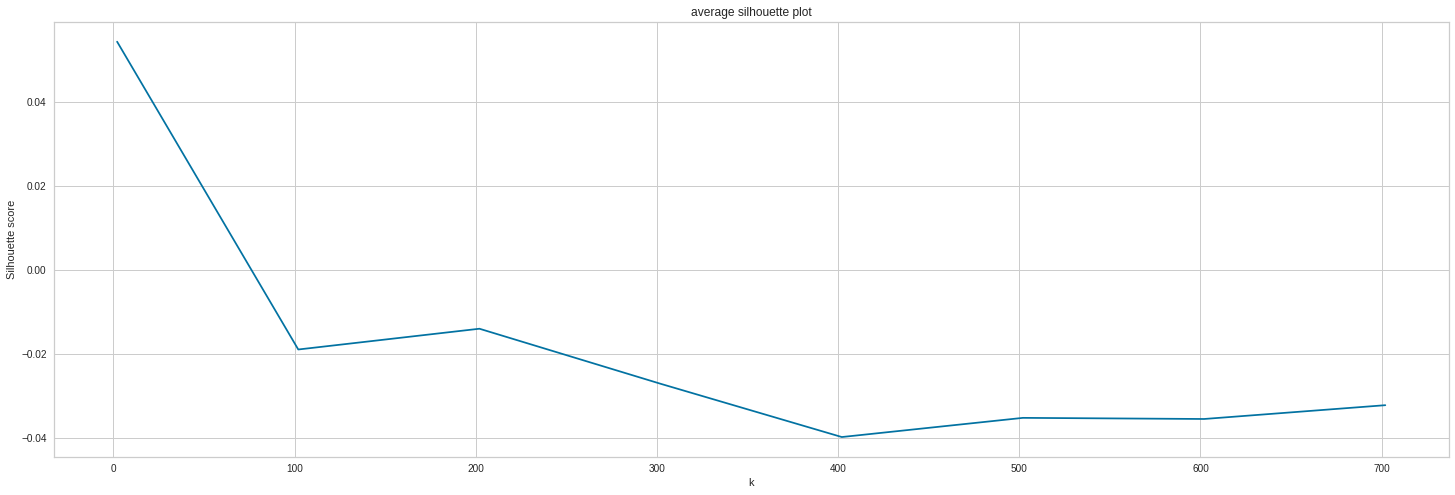

In [ ]:
get_silhouette_plot(df_arr,703,100)

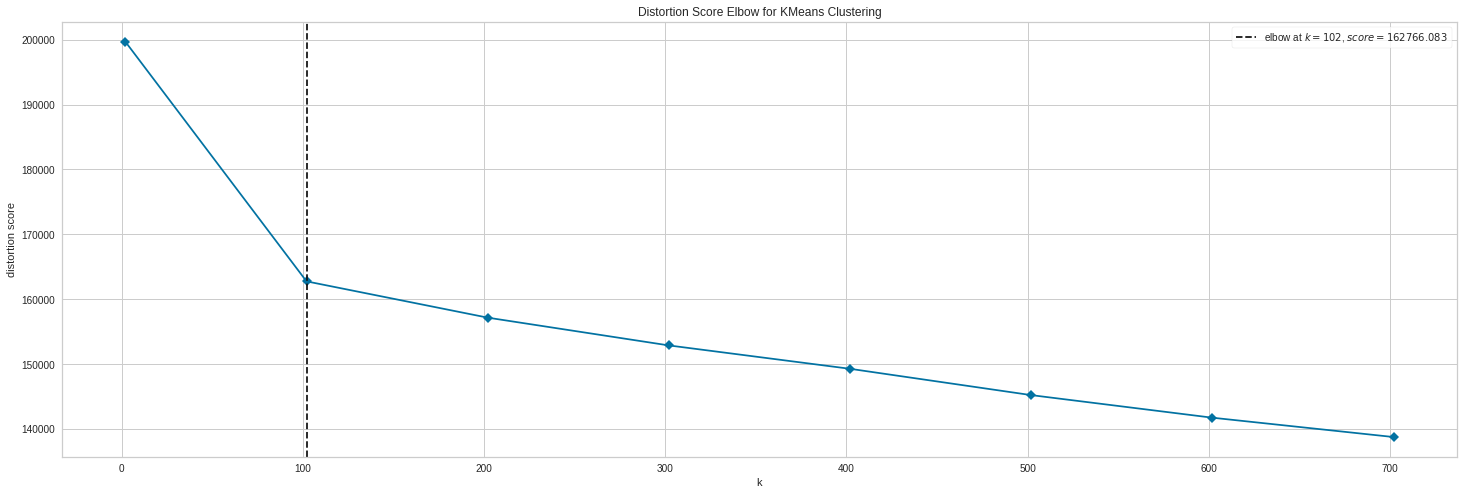

In [ ]:
get_elbowplot(df_arr,704,100)

Loading...: 100%|██████████| 4/4 [00:31<00:00,  7.96s/it]


Text(0.5, 0, 'k')

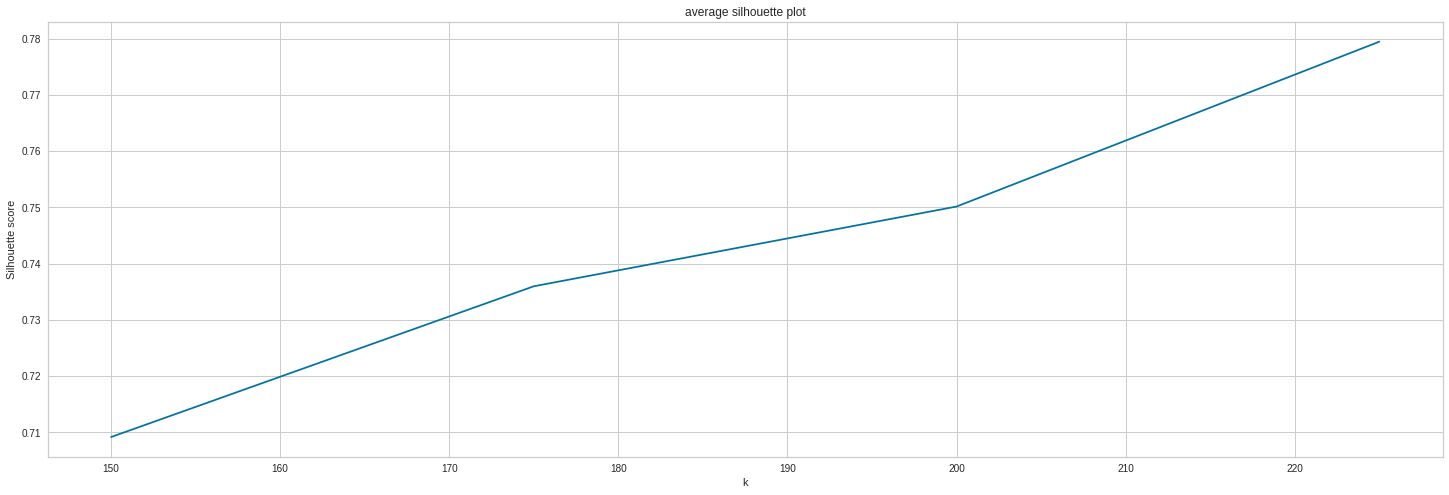

In [ ]:
y=[]
x=[]
for k in tqdm([150,175,200,225],desc='Loading...'):
  x.append(k)
  kmeans = KMeans(n_clusters=k,random_state=31)
  cluster_labels = kmeans.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels)
  y.append(silhouette_avg)
    
plt.plot(x,y)
plt.title('average silhouette plot')
plt.ylabel('Silhouette score')
plt.xlabel('k')

Loading...: 0it [00:00, ?it/s]


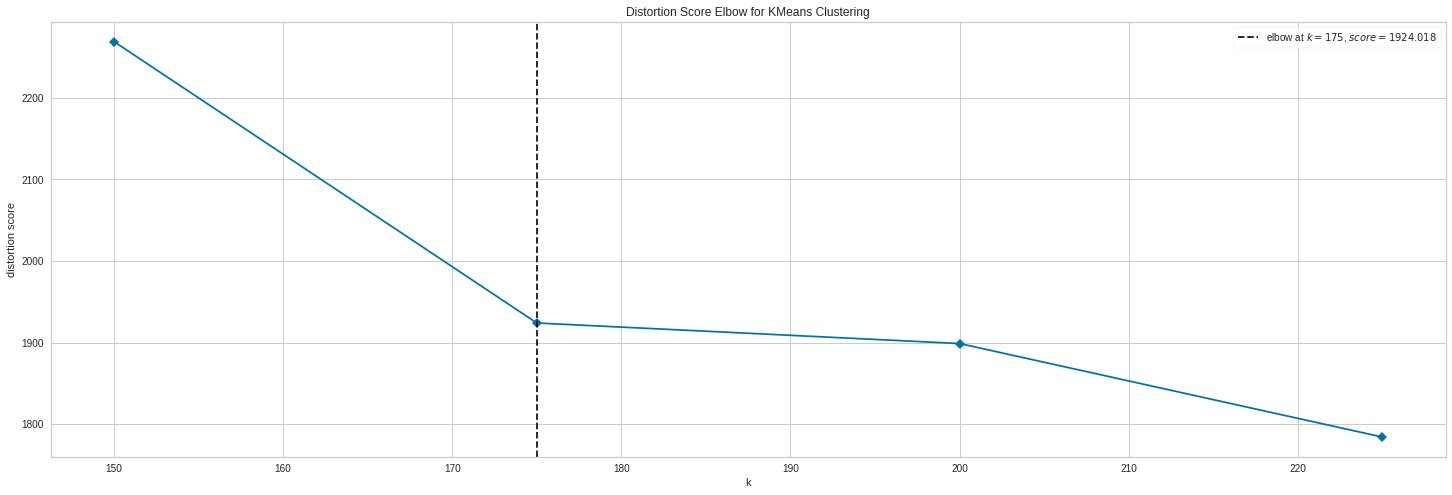

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(
model, k=[150,175,200,225], metric='distortion',timings=False)
tqdm(visualizer.fit(X),desc='Loading...')
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=175)
kmeans.fit(df_arr)


predictions = kmeans.fit_predict(df_arr)


predictions_df = pd.DataFrame(predictions, columns=['cluster'])

In [ ]:
cdf = pd.concat([df.iloc[:,:5],predictions_df],axis=1)

In [ ]:
cdf

,show_id,type,NAME,country,rating,cluster
0,s1,TV Show,3%,Brazil,TV-MA,138
1,s2,Movie,7:19,Mexico,TV-MA,45
2,s3,Movie,23:59,Singapore,R,87
3,s4,Movie,9,United States,PG-13,127
4,s5,Movie,21,United States,PG-13,158
...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",TV-MA,45
7783,s7784,Movie,Zubaan,India,TV-14,161
7784,s7785,Movie,Zulu Man in Japan,,TV-MA,3
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,TV-PG,165


In [ ]:
def get_cluster(id):
  '''enter an ineger between 0 and 7787 to get the cluster of the movie'''
  sm = list(cdf[cdf['show_id']=='s'+str(id)]['NAME'])[0]
  print(f'Selected movie is {sm[0]}')
  N=int(cdf[cdf['show_id']=='s'+str(id)]['cluster'])
  return cdf[cdf['cluster']==N]


In [ ]:
get_cluster(6753)

Selected movie is T


,show_id,type,NAME,country,rating,cluster
4,s5,Movie,21,United States,PG-13,158
17,s18,Movie,22-Jul,"Norway, Iceland, United States",R,158
72,s73,Movie,17 Again,United States,PG-13,158
84,s85,Movie,21 & Over,United States,R,158
94,s95,Movie,28 Days,United States,PG-13,158
...,...,...,...,...,...,...
7478,s7479,Movie,War Horse,"United States, India",PG-13,158
7588,s7589,Movie,Where's the Money,United States,R,158
7621,s7622,Movie,Wild Oats,"Germany, United States",PG-13,158
7632,s7633,Movie,Wine Country,United States,R,158


##Heurestic approach on the improved dataset 

In [ ]:
fdf = rdf.copy()

In [ ]:
genres_list = fdf.columns.to_list()[2:]

In [ ]:
genres_list[4600:]

In [ ]:
df5 = fdf.copy()

In [ ]:
df5 = df5.reset_index().drop(columns='show_id').rename(columns={'index':'id'})

In [ ]:
df5.head()

In [ ]:
#calculating distance between two movies in space
from scipy import spatial
def dist(id1,id2):
  XA=df5[df5['id']==id1][genres_list].values #from actual_set
  XB=df5[df5['id']==id2][genres_list].values #scanning through train set part
  return spatial.distance.cosine(XA,XB),id1,id2

In [ ]:
def get_recommended(id1,n=5):
  '''Enter movie id name on which you want to get recommended and the number of recommendations you want'''
  input_movie_name = df5["NAME"][id1]
  print(f'selected show/movie is {input_movie_name}')
  input_array = df5[df5['id']==id1][genres_list].to_numpy()
  movie_dists=[]
  for i in list(df5['id']):
    movie_dists.append(dist(id1,i))
  X = sorted(movie_dists, 
       key=lambda x: x[0])
  recom_id = []
  for i in X:
    recom_id.append(i[2])
  Z=[x for x in recom_id if x not in [id1]]
  recom_cont = []
  for k in Z:
    recom_cont.append(df5[df5["id"]==k]["NAME"].to_list())
  print('Recommended Movies are:')
  return recom_cont[:n]

In [ ]:
id1=5776

In [ ]:
get_recommended(5773,10)

selected show/movie is Spy Kids
Recommended Movies are:


[['Spy Kids 2: The Island of Lost Dreams'],
 ['Spy Kids: All the Time in the World'],
 ['Spy Kids 3: Game Over'],
 ['Puss in Boots'],
 ['The Spy Next Door'],
 ['Radio Rebel'],
 ['Christmas with the Kranks'],
 ['Russell Madness'],
 ['Unaccompanied Minors'],
 ['Figaro Pho']]

In [ ]:
get_recommended(7000,10)

selected show/movie is The Willoughbys
Recommended Movies are:


[['Cloudy with a Chance of Meatballs 2'],
 ['The Nut Job'],
 ['Muppets Most Wanted'],
 ['Figaro Pho'],
 ['Spy Kids: All the Time in the World'],
 ['Bigger Fatter Liar'],
 ['Open Season'],
 ['Bratz: The Movie'],
 ['Pettersson and Findus 2'],
 ['Russell Madness']]

In [ ]:
get_recommended(4567,20)

selected show/movie is October Faction
Recommended Movies are:


[['Another Life'],
 ['The I-Land'],
 ['Lost in Space'],
 ['Valor'],
 ['Altered Carbon'],
 ['V Wars'],
 ['Daybreak'],
 ['Black Summer'],
 ["Marvel's Jessica Jones"],
 ['Black Lightning'],
 ['Outer Banks'],
 ['Marco Polo'],
 ['Thieves of the Wood'],
 ["Marvel's Iron Fist"],
 ['Spartacus'],
 ['Van Helsing'],
 ['Outlander'],
 ['Cobra Kai'],
 ['Mossad 101'],
 ['The Witcher']]

In [ ]:
get_recommended(5836,12)

selected show/movie is Stranger Things
Recommended Movies are:


[['Beyond Stranger Things'],
 ['Nightflyers'],
 ['Warrior Nun'],
 ['The Vampire Diaries'],
 ['Chilling Adventures of Sabrina'],
 ['Helix'],
 ['The Messengers'],
 ['The Umbrella Academy'],
 ['The Twilight Zone (Original Series)'],
 ['The 4400'],
 ['Good Witch'],
 ['The OA']]

#Conclusions

**About the data**
1. USA and India contribute for most of the movies.

2. The pair Raúl Campos, Jan Suter directed highest number of content available in this dataset. They have directed standup-comedy movies based out of south american countries like 'Mexico', 'Colombia', 'Argentina', 'Chile'.

3. Anupam Kher and many other indian actors featured in a lot of movies in the dataframe but no indian directors are present in the top director list. So, we may infer that a lot of missing entries in director column are regarding indian movies.

4. From this data we see that by a small margin the number of content added in Netflix increases at the end of the year. Which is evident because of indian and western festivals and holidays around that time

5. There is an increase of R-Rated movies and decrease in PG-13 movies between 2008 and 2021.

6. Adventure, Drame, Comedy are the most famous genres.